# Inspect SDSS DR16 Quasar Samples

In [1]:
import sys
sys.path.append("..")

from astropy.io import fits
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from lib.dataset_sdssquasarspec import SDSSQuasarSpecDataset
from lib.get_config import get_config
cfg = get_config('../config/config.yaml')

Load config file >> ../config/config.yaml


/Users/sukyee/opt/miniconda3/envs/mltorch/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv(Path(cfg['data_dir'], 'catalogue', 'sdssdr16q_prop.csv'), sep=',', header=0)
list_files = np.asarray([str(f) for f in Path(cfg['data_dir'], 'spectra').rglob('*.fits.gz')])

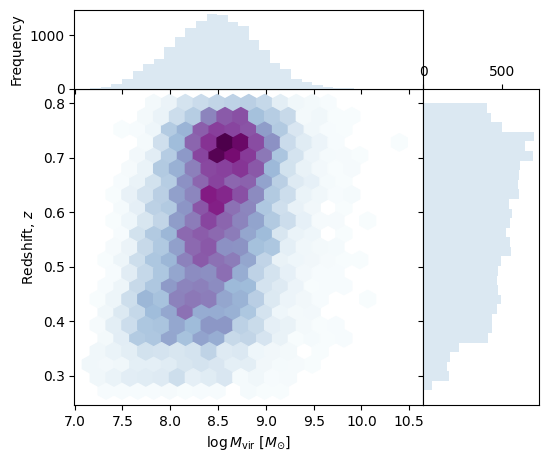

In [3]:
fig = plt.figure(figsize=(6,5))
gs = fig.add_gridspec(2, 2, width_ratios=(3,1), height_ratios=(1,4), top=0.9, right=0.9, hspace=0., wspace=0.)

ax = fig.add_subplot(gs[1, 0])
ax.hexbin(df['LOGMBH'], df['Z_FIT'], gridsize=20, mincnt=1, cmap='BuPu')

ax_xhist = fig.add_subplot(gs[0, 0], sharex=ax)
ax_xhist.hist(df['LOGMBH'], bins=30, color=plt.get_cmap('BuPu', 8)(1))
ax_yhist = fig.add_subplot(gs[1, 1], sharey=ax)
# ax_yhist.hist(df['Z_FIT'], bins=30, orientation='horizontal', alpha=0.6)
ax_yhist.hist(df['Z_FIT'], bins=30, orientation='horizontal', color=plt.get_cmap('BuPu', 8)(1))

ax_xhist.tick_params(axis="x", labelbottom=False)
ax_yhist.tick_params(top=True, labeltop=True, labelbottom=False, bottom=False, labelleft=False)

ax.set_xlabel(r'$\log M_{\mathrm{vir}}\ [M_{\odot}]$')
ax.set_ylabel(r'Redshift, $z$')
ax_xhist.set_ylabel('Frequency')
fig.savefig('plots/datamvirvsz.pdf', bbox_inches='tight')
plt.show()

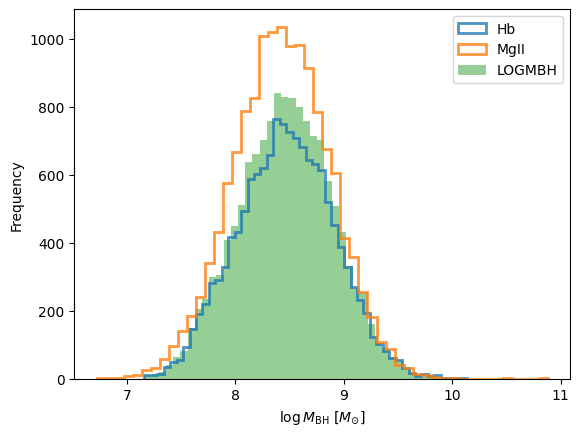

In [4]:
fig, ax = plt.subplots()
df['LOGMBH_HB'].plot.hist(bins=50, histtype='step', lw=2, alpha=0.8, label='Hb')
df['LOGMBH_MGII'].plot.hist(bins=50, histtype='step', lw=2, alpha=0.8, label='MgII')
df['LOGMBH'].plot.hist(bins=50, alpha=0.5)
ax.legend()
ax.set_xlabel(r'$\log M_{\mathrm{BH}}\ [M_{\odot}]$')
plt.show()

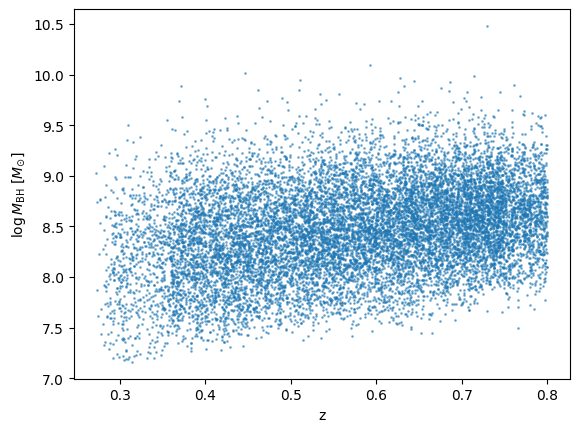

In [7]:
fig, ax = plt.subplots()
ax.scatter(df['Z_FIT'], df['LOGMBH'], s=1, alpha=0.5)
ax.set_xlabel('z')
ax.set_ylabel(r'$\log M_{\mathrm{BH}}\ [M_{\odot}]$')
plt.show()

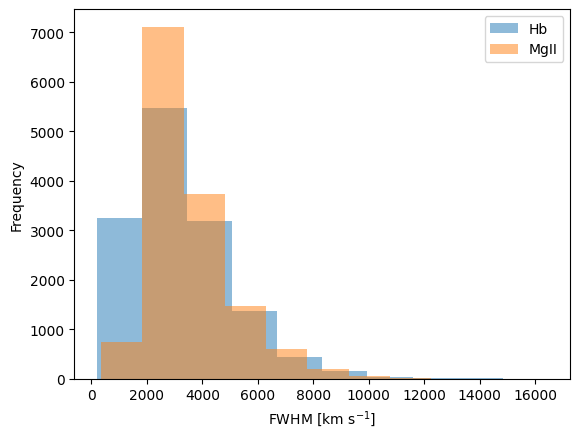

In [9]:
fig, ax = plt.subplots()
df['HBETA_FWHM'].plot.hist(alpha=0.5, label='Hb')
df['MGII_FWHM'].plot.hist(alpha=0.5, label='MgII')
ax.legend()
ax.set_xlabel(r'FWHM [km s$^{-1}$]')
plt.show()

## Visualize Quasar Spectrum

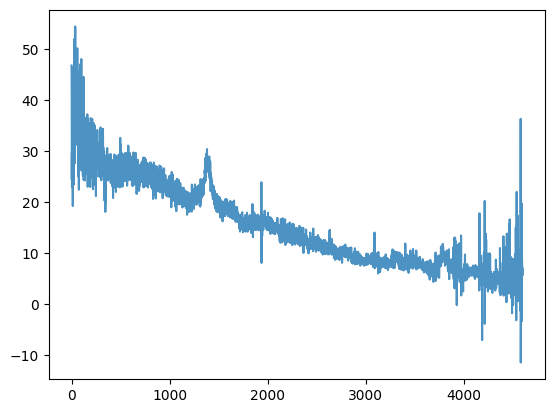

In [8]:
# Plot spectrum
sample_n = 10
objid = SDSSQuasarSpecDataset.get_labelbyfilename(df, path_fits=list_files[sample_n])[0][0]
data = fits.getdata(Path(cfg['data_dir'], 'spectra', f"op-{objid}.fits.gz"), ext=3)
plt.figure()
plt.plot(data['flux_prereduced'], alpha=0.8)
plt.show()

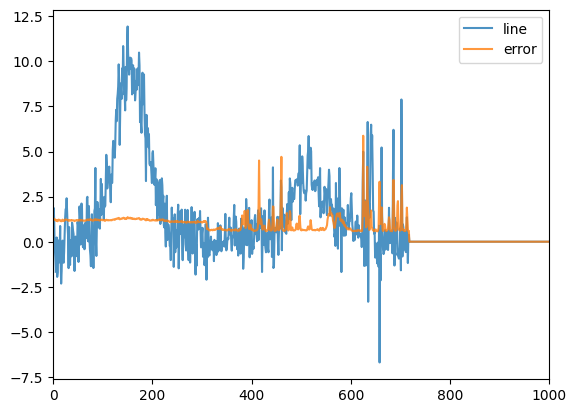

In [4]:
# Plot line flux
sample_n = 10
objid = SDSSQuasarSpecDataset.get_labelbyfilename(df, path_fits=list_files[sample_n])[0][0]
data = fits.getdata(Path(cfg['data_dir'], 'spectra', f"op-{objid}.fits.gz"), ext=3)
plt.figure()
plt.plot(data['flux_line'], alpha=0.8, label='line')
plt.plot(data['err_line'], alpha=0.8, label='error')
plt.xlim(0, 1000)
plt.legend()
plt.show()